## Imports
Execute the cell below to import all packages needed.

In [40]:
# System functionality
import sys
sys.path.append('..')

import glob
import os
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import graphviz
import math as math
import json
import cv2
from emoji_extractor.extract import Extractor
from skimage import io

## Load csv into pandas dataframe

In [2]:
path_csv = '/home/stelios/Desktop/Honours Project/Samples/tweet_data/tweets_joh_all.csv'

joh_df = pd.read_csv(path_csv,index_col=None, header=0, low_memory = False).applymap(str)

## Extract & Count Emojis

In [4]:
extract = Extractor()

count = extract.count_all_emoji(joh_df['text'])

# Display most common
count.most_common()

[('😂', 927229),
 ('😭', 190321),
 ('🤣', 189896),
 ('🔥', 136057),
 ('😍', 93776),
 ('❤', 92624),
 ('💔', 40228),
 ('💀', 35877),
 ('😩', 33553),
 ('😅', 29872),
 ('😊', 26942),
 ('😢', 25902),
 ('🙏', 19699),
 ('👏', 19161),
 ('🙌', 18165),
 ('🤔', 18054),
 ('😁', 17479),
 ('😹', 16310),
 ('💕', 15555),
 ('👀', 14580),
 ('🙄', 14106),
 ('💃', 13801),
 ('😘', 13574),
 ('👌', 13255),
 ('♥', 12228),
 ('🙈', 11303),
 ('🙏🏾', 10642),
 ('😔', 10469),
 ('🤗', 10084),
 ('💯', 10079),
 ('😒', 10067),
 ('✨', 9350),
 ('😏', 8063),
 ('🙌🏾', 7998),
 ('😀', 7802),
 ('😱', 7756),
 ('😉', 7503),
 ('😋', 7469),
 ('☺', 7467),
 ('😥', 6992),
 ('😳', 6920),
 ('😑', 6809),
 ('🎉', 6540),
 ('😎', 6472),
 ('😫', 6364),
 ('👏🏾', 6361),
 ('😆', 6204),
 ('💜', 6182),
 ('💖', 5961),
 ('🙃', 5948),
 ('😕', 5882),
 ('😣', 5828),
 ('✊', 5809),
 ('😃', 5762),
 ('😪', 5734),
 ('💛', 5597),
 ('😄', 5415),
 ('🙏🏽', 5346),
 ('😤', 5327),
 ('🙂', 5146),
 ('🚀', 5061),
 ('🎶', 4977),
 ('👑', 4901),
 ('🏆', 4812),
 ('🙌🏽', 4730),
 ('🙆', 4686),
 ('😐', 4600),
 ('👏🏽', 4529),
 ('💃🏽',

## Create a Sorted Pandas DataFrame with Emoji Counts 

In [5]:
# Create panda dataframe to store emojis with counts
emojis_count_df = pd.DataFrame(columns = ['Emoji','Count'])
for emoji in count:
    emojis_count_df = emojis_count_df.append({'Emoji' : emoji , 'Count' : count[emoji]} , ignore_index=True)

# Sort dataframe by count
emojis_count_df = emojis_count_df.sort_values(by=['Count'])
emojis_count_df

,Emoji,Count
2148,🧖‍♂️,1
859,🇻🇮,1
1991,🥌,1
1990,♟,1
1752,👩🏻‍🏫,1
1753,👩🏿‍🔬,1
1987,👨‍⚖️,1
1754,👩🏼‍⚖️,1
1984,👱‍♀️,1
1768,🚣🏽‍♀️,1


## Top 20 Emojis Graph

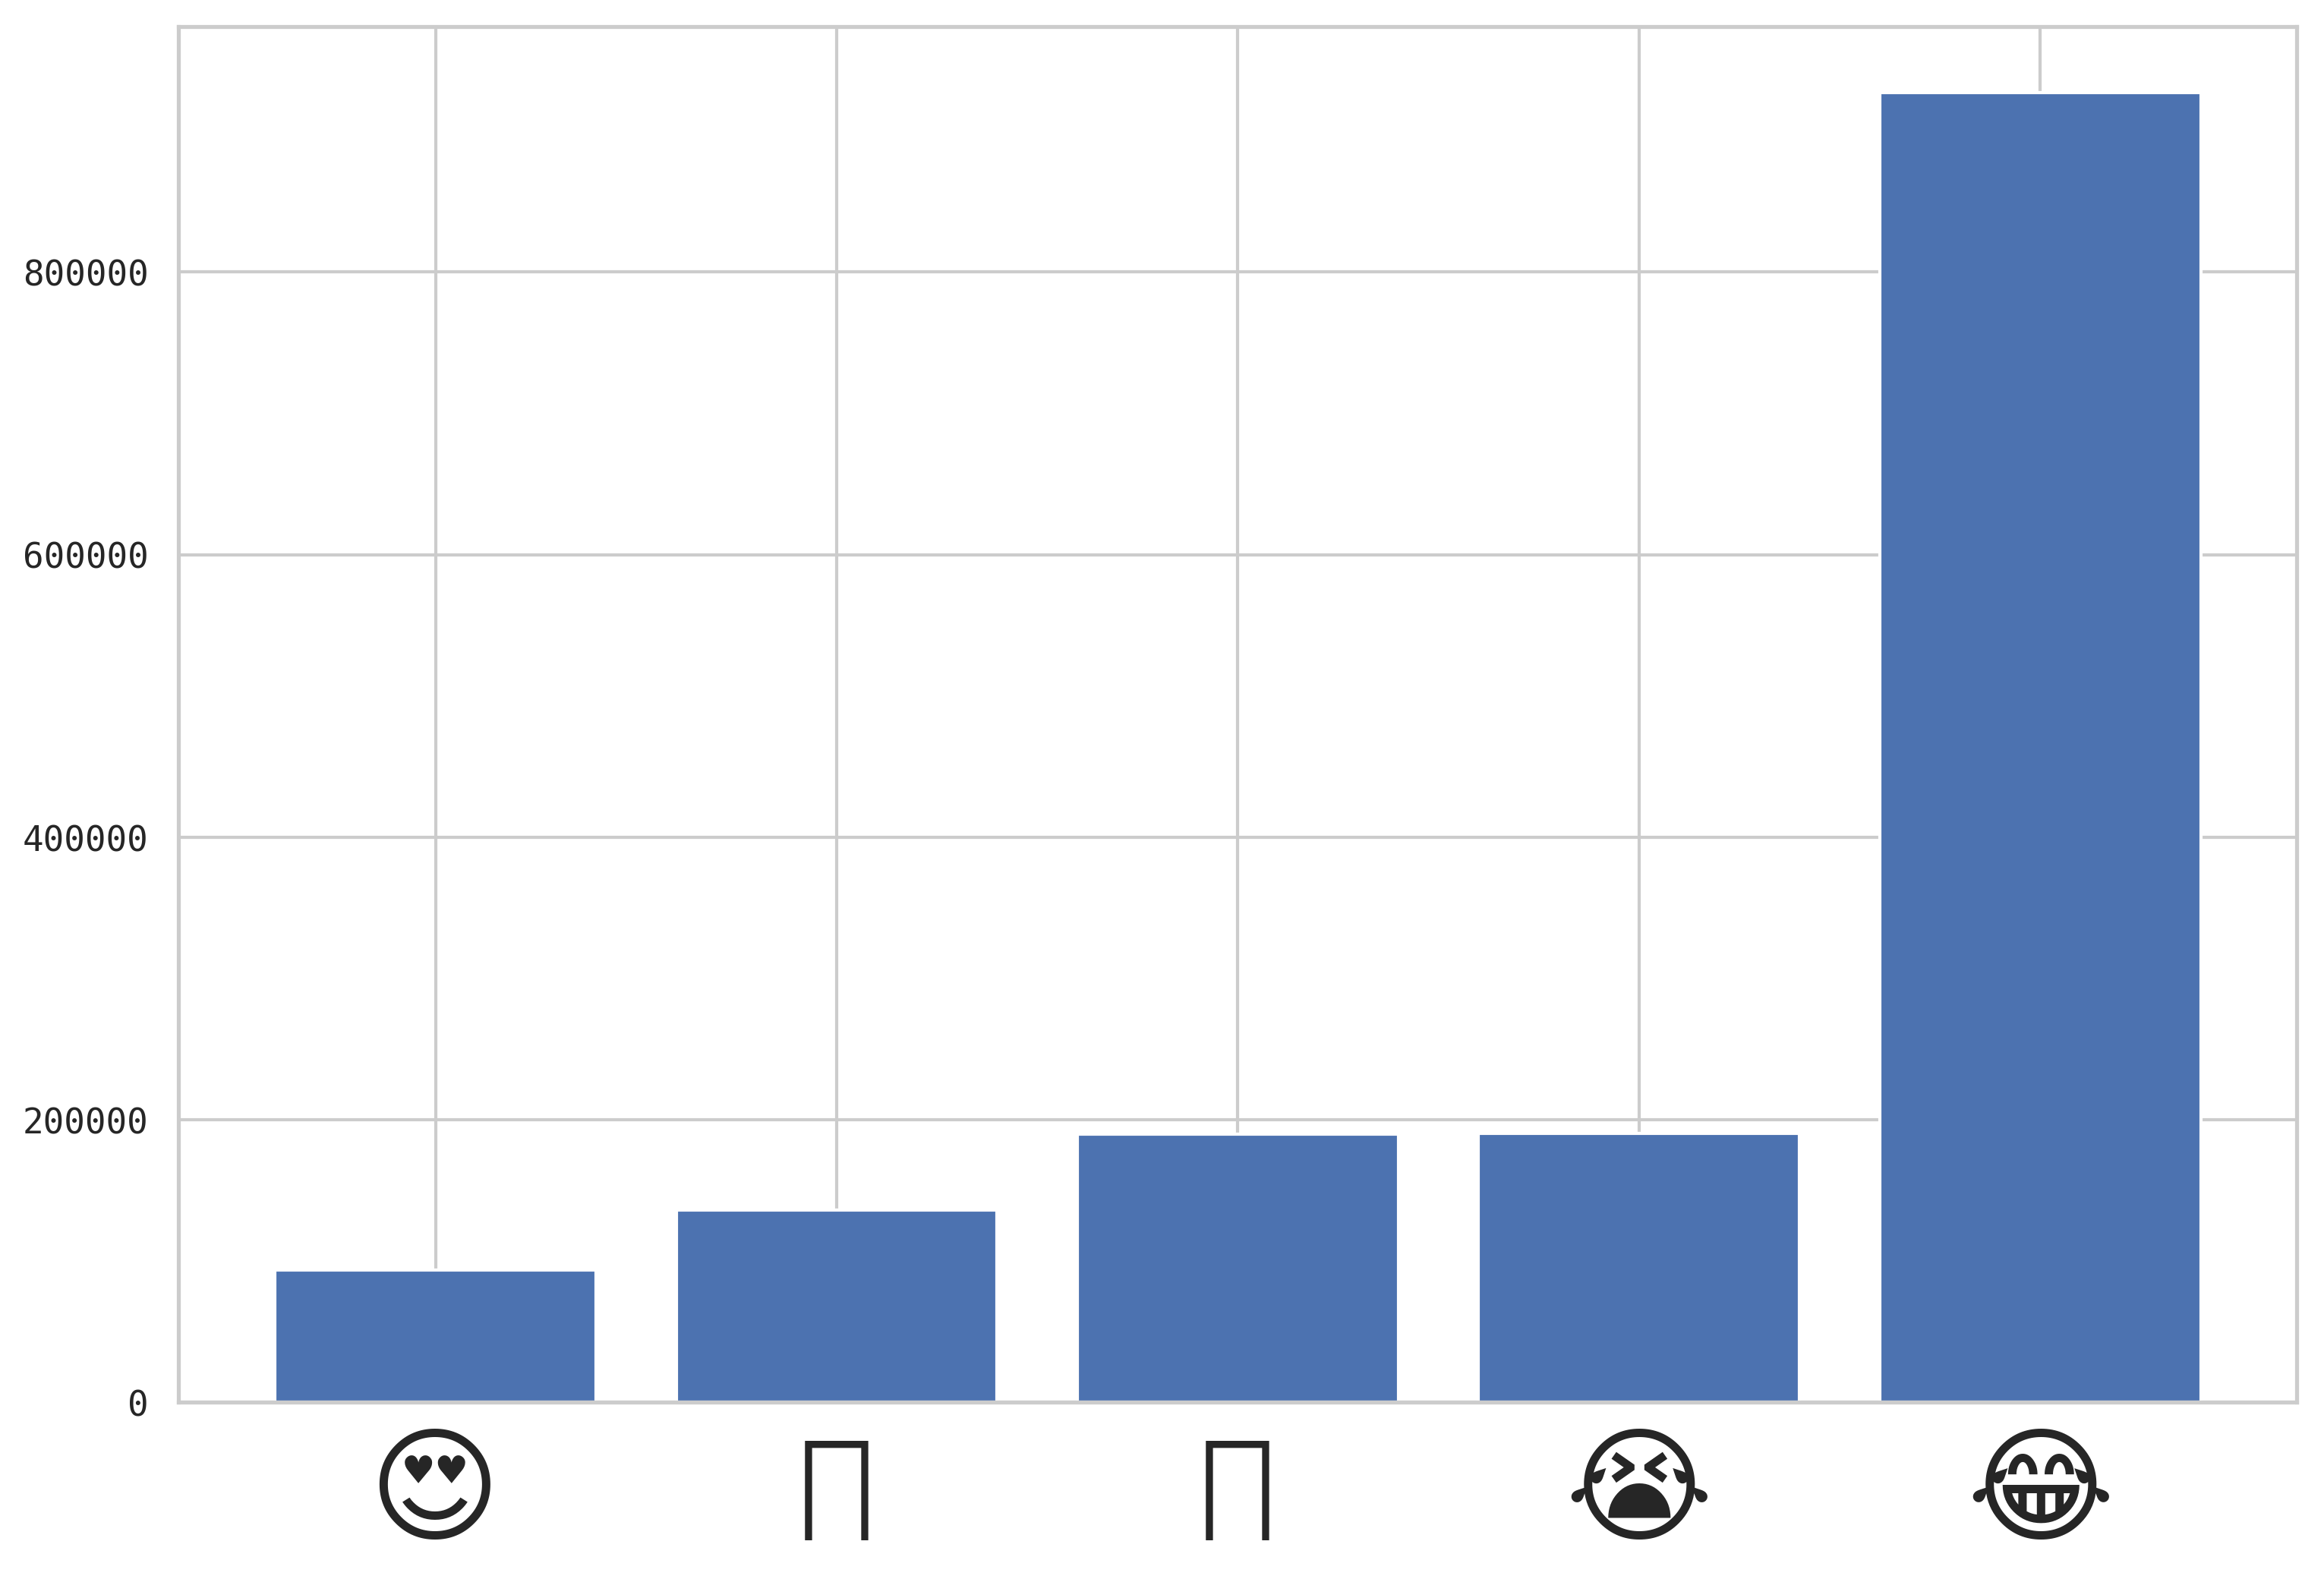

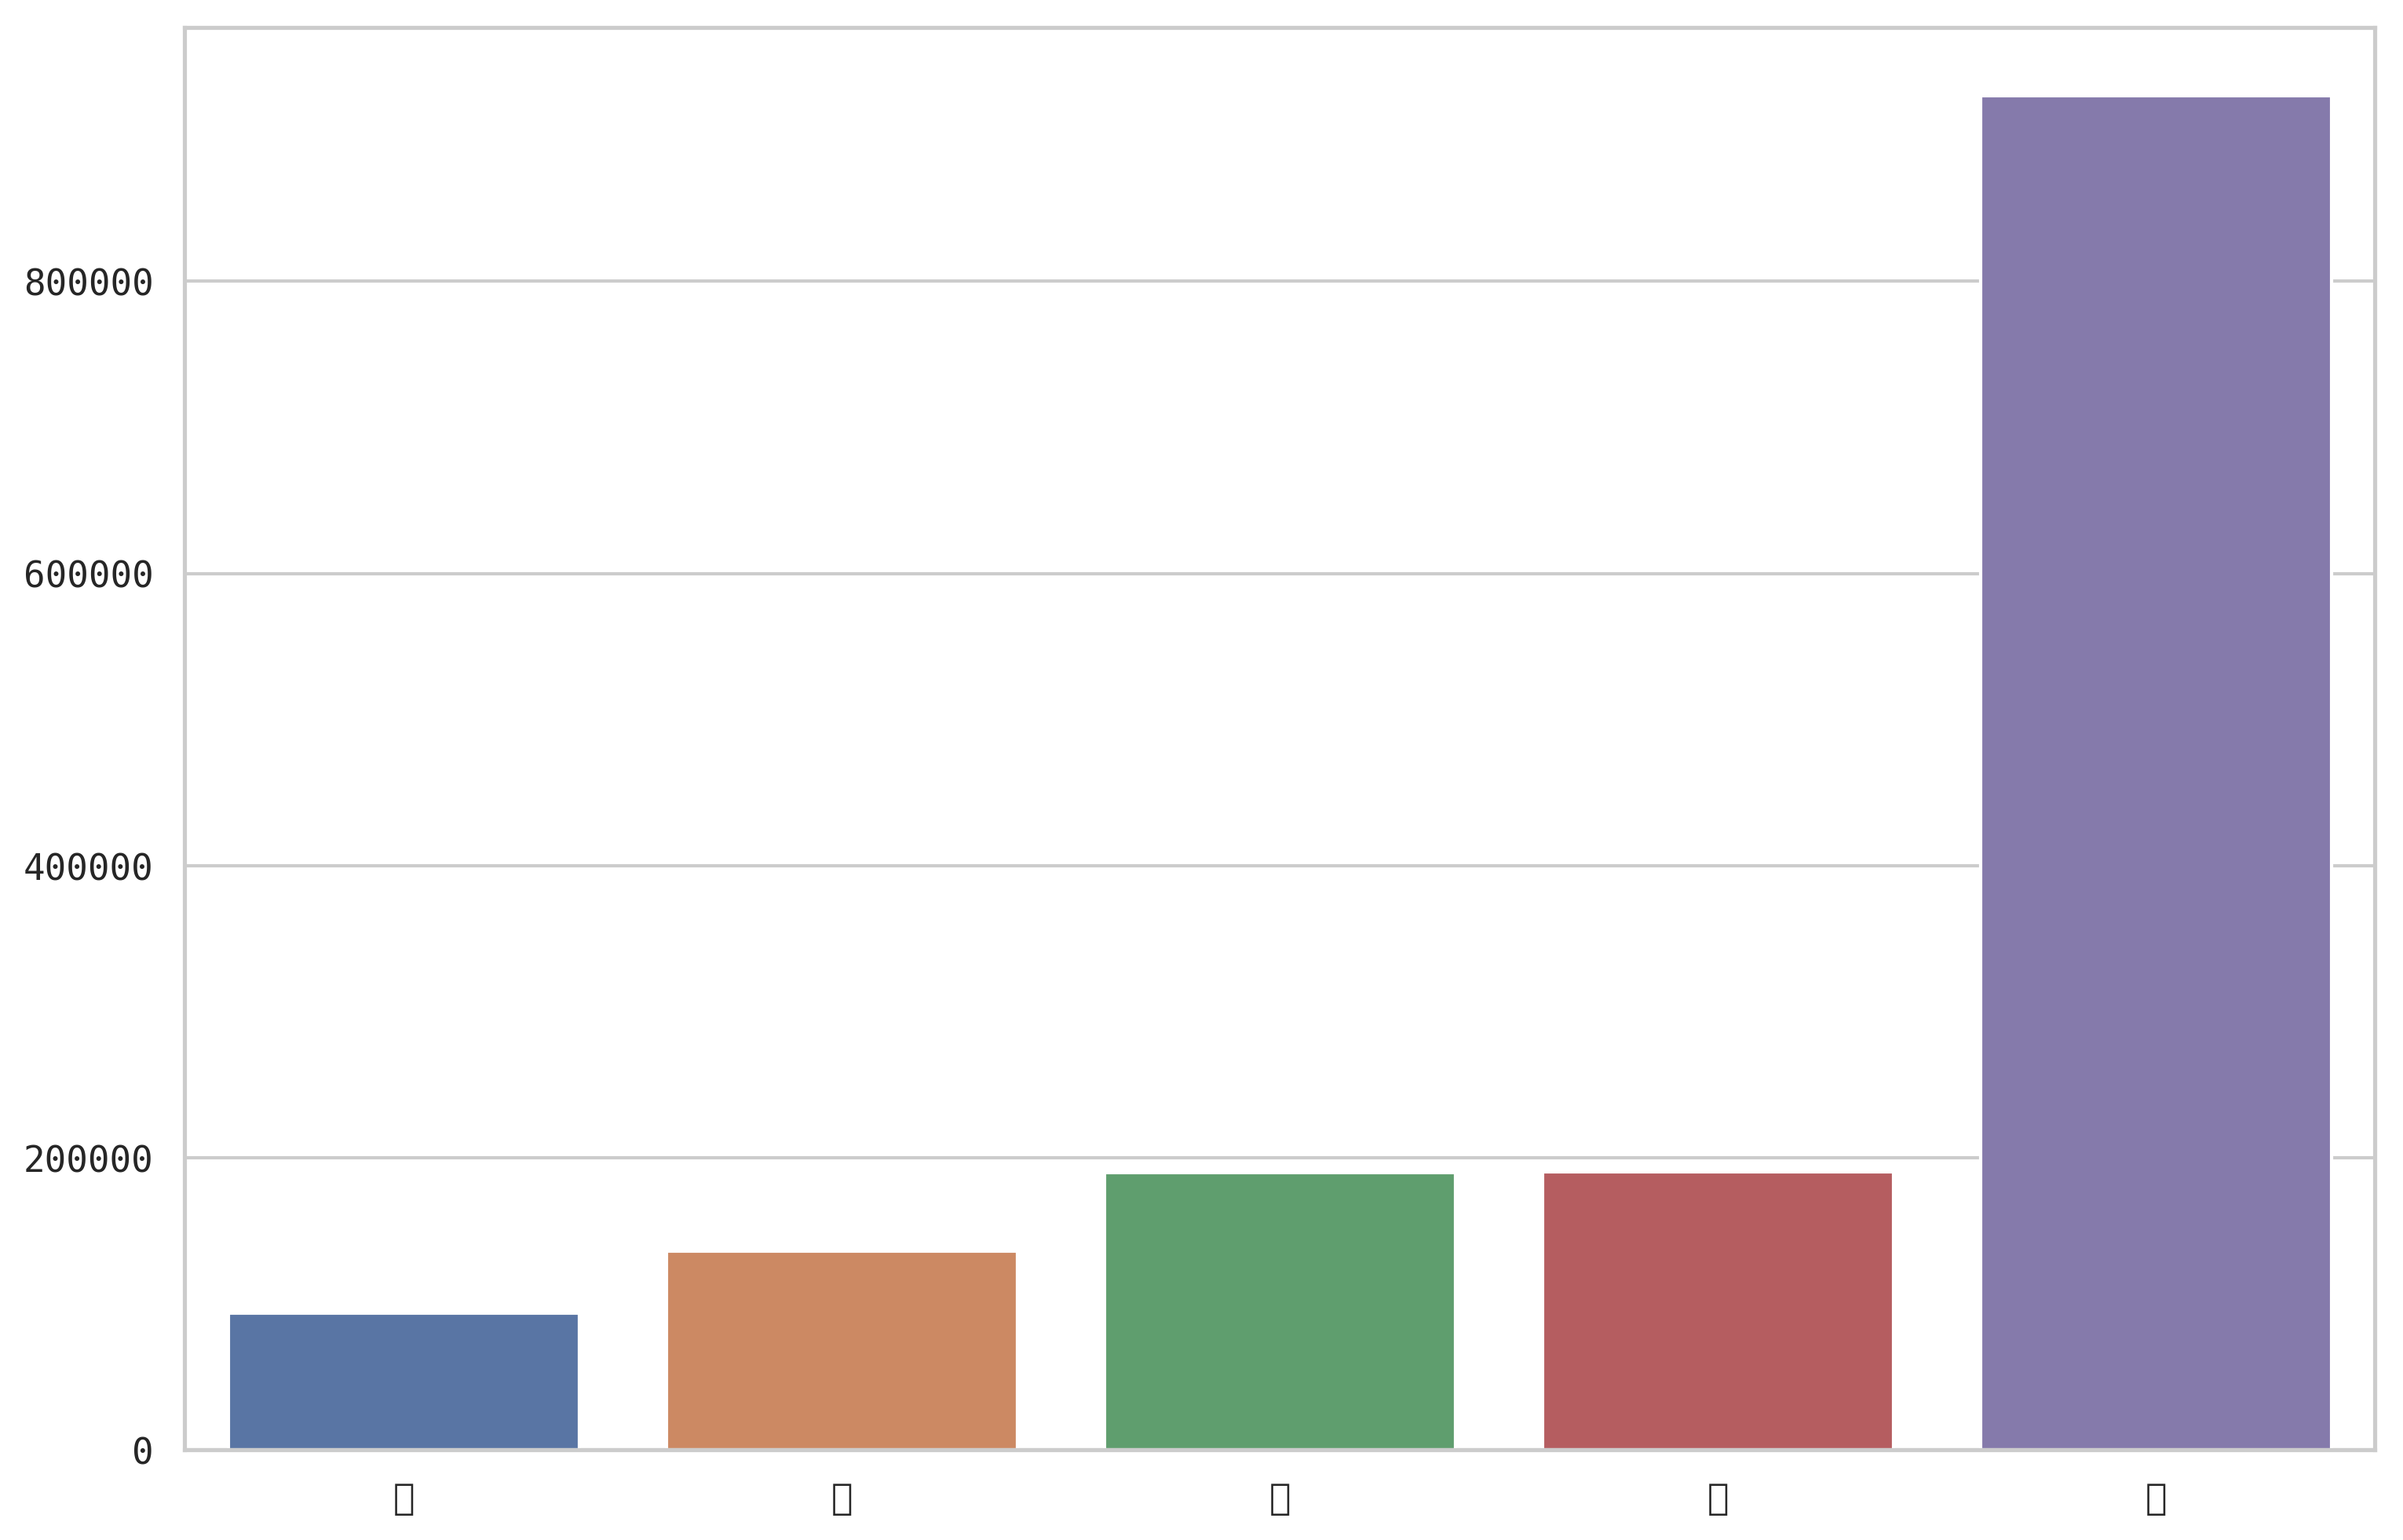

In [81]:
x = emojis_count_df['Emoji'].tail(5).values
y = emojis_count_df['Count'].tail(5).values


plt.rcParams['font.size'] = 20
plt.rcParams["font.monospace"] = ["DejaVu Sans Mono"]
plt.rcParams["font.family"] = "monospace"


plt.bar(x, y, width=0.8, bottom=None, align='center', data=emojis_count_df.tail(5))
plt.xticks(x,x,fontname='',fontsize=40)
plt.show()

sns.barplot(x=x,y=y) 